<a href="https://colab.research.google.com/github/antonyYG/examen/blob/main/examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 pip install tensorflow tensorflow-datasets matplotlib

Ejercicio 1


In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Mostrar dimensiones
print("Dimensiones del conjunto de entrenamiento:", x_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", x_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento: (60000, 28, 28) (60000,)
Dimensiones del conjunto de prueba: (10000, 28, 28) (10000,)


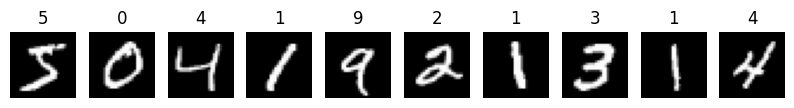

In [8]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()


Ejercicio 2

In [9]:
# Normalizar los valores de los píxeles
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("Rango de valores de píxeles después de normalizar:")
print(f"x_train -> min: {x_train.min()}, max: {x_train.max()}")

# Convertir las etiquetas a one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("\nEjemplo de etiqueta codificada:")
print(y_train[0])  # muestra la primera etiqueta transformada


Rango de valores de píxeles después de normalizar:
x_train -> min: 0.0, max: 1.0

Ejemplo de etiqueta codificada:
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Ejercicio 3

In [10]:
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#  Reducir el tamaño de los conjuntos
x_train = x_train[:10000]
y_train = y_train[:10000]

# Aplanar las imágenes 28x28 → 784 (vector)
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

#  Normalizar los valores (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 5Estandarizar características (recomendado para SVM)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#  Crear y entrenar el modelo SVM
clf = svm.SVC(kernel='rbf', gamma='scale')  # kernel RBF da buenos resultados
print("Entrenando el modelo SVM... (puede tardar unos minutos)")
clf.fit(x_train, y_train)

#  Evaluar el modelo
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nExactitud (accuracy) del SVM en el conjunto de prueba: {accuracy * 100:.2f}%")


Entrenando el modelo SVM... (puede tardar unos minutos)

Exactitud (accuracy) del SVM en el conjunto de prueba: 93.80%


Ejercicio 4

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

#  Cargar el dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los valores de píxeles (0–255 → 0–1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir etiquetas a one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#  Definir el modelo MLP
model = Sequential([
    Flatten(input_shape=(28, 28)),        # Aplana la imagen 28x28 → 784
    Dense(128, activation='relu'),        # Capa oculta 1
    Dense(64, activation='relu'),         # Capa oculta 2
    Dense(10, activation='softmax')       # Capa de salida (10 clases)
])

# Compilar el modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1
)

#  Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Precisión (accuracy) en el conjunto de prueba: {test_acc * 100:.2f}%")


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8399 - loss: 0.5870 - val_accuracy: 0.9510 - val_loss: 0.1626
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9582 - loss: 0.1440 - val_accuracy: 0.9634 - val_loss: 0.1212
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9714 - loss: 0.0979 - val_accuracy: 0.9686 - val_loss: 0.1006
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9792 - loss: 0.0701 - val_accuracy: 0.9738 - val_loss: 0.0810
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9830 - loss: 0.0566 - val_accuracy: 0.9766 - val_loss: 0.0755
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9863 - loss: 0.0444 - val_accuracy: 0.9773 - val_loss: 0.0732
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9903 - loss: 0.0336 - val_accuracy: 0.9762 - val_loss: 0.0765
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9915 - loss: 0.0299 - val_accuracy:

In [18]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Cargar y preparar los datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#  Definir una función para crear y entrenar modelos con distintos hiperparámetros
def crear_entrenar_modelo(neuronas1, neuronas2, optimizador):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(neuronas1, activation='relu'),
        Dense(neuronas2, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizador,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        x_train, y_train,
        epochs=5,
        batch_size=128,
        validation_data=(x_test, y_test),
        verbose=0
    )

    val_acc = history.history['val_accuracy'][-1]
    print(f" Modelo({neuronas1}, {neuronas2}), opt={optimizador} → Precisión validación: {val_acc*100:.2f}%")
    return val_acc


resultados = {}

# Distintas combinaciones de neuronas y optimizadores
configuraciones = [
    (128, 64, 'adam'),
    (256, 128, 'adam'),
    (128, 64, 'sgd'),
    (256, 128, 'rmsprop')
]

for n1, n2, opt in configuraciones:
    acc = crear_entrenar_modelo(n1, n2, opt)
    resultados[f"{n1}-{n2}-{opt}"] = acc


 Modelo(128, 64), opt=adam → Precisión validación: 97.52%
 Modelo(256, 128), opt=adam → Precisión validación: 97.50%
 Modelo(128, 64), opt=sgd → Precisión validación: 91.87%
 Modelo(256, 128), opt=rmsprop → Precisión validación: 98.15%


In [19]:
import pandas as pd

tabla_resultados = pd.DataFrame.from_dict(resultados, orient='index', columns=['Accuracy Validación'])
print("\nComparativa de configuraciones:\n")
print(tabla_resultados.sort_values(by='Accuracy Validación', ascending=False))


Comparativa de configuraciones:

                 Accuracy Validación
256-128-rmsprop               0.9815
128-64-adam                   0.9752
256-128-adam                  0.9750
128-64-sgd                    0.9187


Ejercicio 6


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8720 - loss: 0.4678 - val_accuracy: 0.9837 - val_loss: 0.0531
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9827 - loss: 0.0564 - val_accuracy: 0.9867 - val_loss: 0.0412
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9885 - loss: 0.0376 - val_accuracy: 0.9867 - val_loss: 0.0400
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9917 - loss: 0.0269 - val_accuracy: 0.9899 - val_loss: 0.0295
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9936 - loss: 0.0215 - val_accuracy: 0.9899 - val_loss: 0.0313
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9947 - loss: 0.0172 - val_accuracy: 0.9897 - val_loss: 0.0315
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9952 - loss: 0.0149 - val_accuracy: 0.9916 - val_loss: 0.0308
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9967 - loss: 0.0105 - val_accuracy: 0

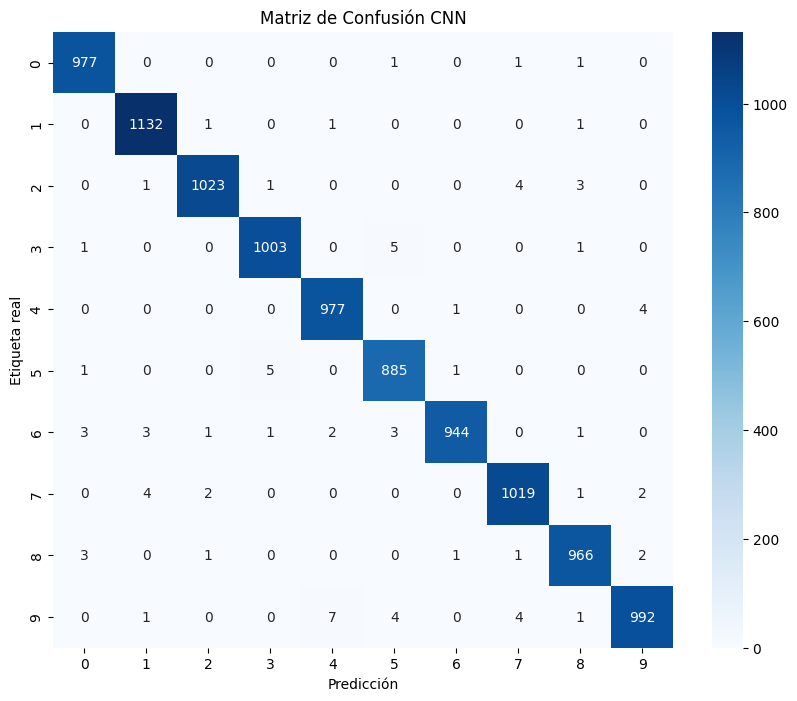


 Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#  Cargar y preparar los datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Expandir dimensiones para CNN: (n_samples, 28,28) → (n_samples,28,28,1)
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encoding de etiquetas
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Definir el modelo CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

#  Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#  Entrenar el modelo
history = model.fit(x_train, y_train_cat,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test, y_test_cat))

#  Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nPrecisión (accuracy) en el conjunto de prueba: {test_acc*100:.2f}%")
print(f" Pérdida (loss) en el conjunto de prueba: {test_loss:.4f}")

#  Matriz de confusión
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión CNN")
plt.show()

#  Reporte de clasificación
print("\n Reporte de clasificación:\n")
print(classification_report(y_test, y_pred_classes))


Ejercicio 7


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9033 - loss: 0.3331 - val_accuracy: 0.8432 - val_loss: 0.5087
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9823 - loss: 0.0599 - val_accuracy: 0.9886 - val_loss: 0.0336
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9882 - loss: 0.0419 - val_accuracy: 0.9888 - val_loss: 0.0339
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9894 - loss: 0.0345 - val_accuracy: 0.9878 - val_loss: 0.0360
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9920 - loss: 0.0268 - val_accuracy: 0.9902 - val_loss: 0.0297
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9922 - loss: 0.0247 - val_accuracy: 0.9924 - val_loss: 0.0236
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9942 - loss: 0.0201 - val_accuracy: 0.9907 - val_loss: 0.0305
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9945 - loss: 0.0178 - val_accuracy: 

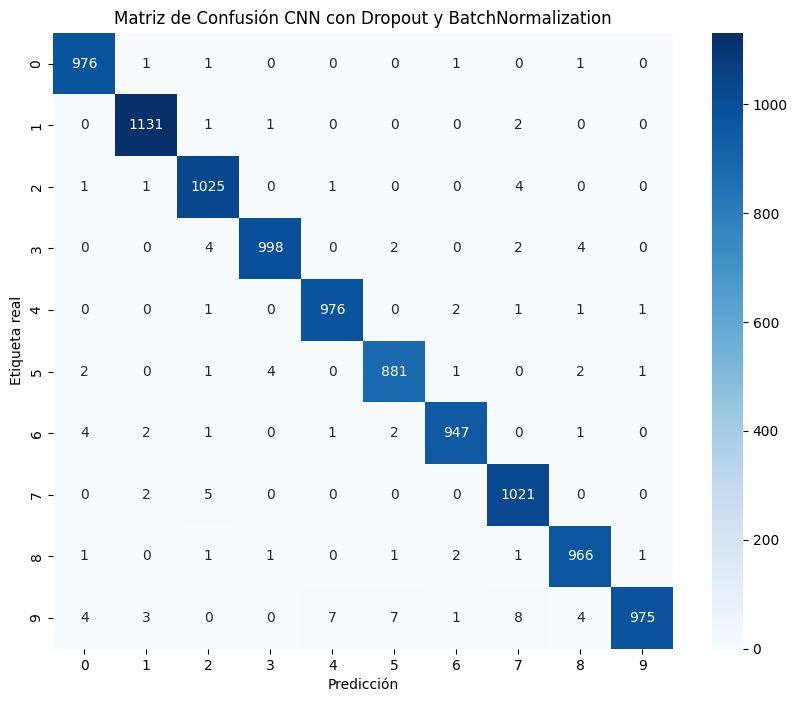

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#  Cargar y preparar los datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype('float32') / 255.0
x_test = x_test.reshape(-1,28,28,1).astype('float32') / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

#  Definir el modelo CNN con Dropout y BatchNormalization
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

#  Compilar y entrenar
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train_cat,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test, y_test_cat))

#  Evaluar
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\n Precisión en test: {test_acc*100:.2f}%")
print(f" Pérdida en test: {test_loss:.4f}")

#  Matriz de confusión
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión CNN con Dropout y BatchNormalization")
plt.show()


Ejercicio 8

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.8059 - loss: 0.6434 - val_accuracy: 0.6923 - val_loss: 0.8262
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9576 - loss: 0.1398 - val_accuracy: 0.9875 - val_loss: 0.0417
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.9696 - loss: 0.1002 - val_accuracy: 0.9884 - val_loss: 0.0407
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9741 - loss: 0.0865 - val_accuracy: 0.9864 - val_loss: 0.0411
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9765 - loss: 0.0773 - val_accuracy: 0.9908 - val_loss: 0.0296
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9798 - loss: 0.0665 - val_accuracy: 0.9920 - val_loss: 0.0271
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9804 - loss: 0.0680 - val_accuracy: 0.9914 - val_loss: 0.0292
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9822 - loss: 0.0608 - 

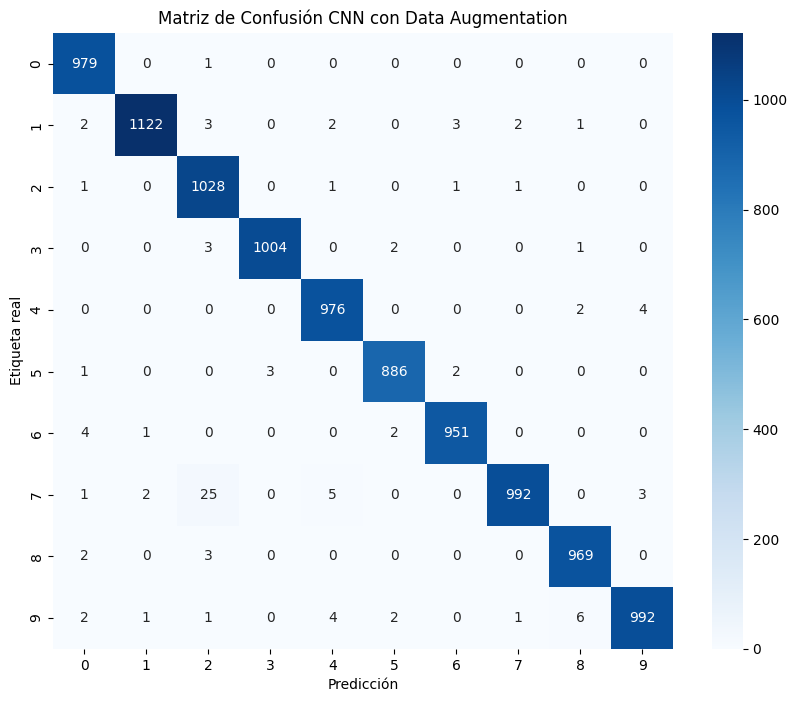

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar y preparar los datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype('float32') / 255.0
x_test = x_test.reshape(-1,28,28,1).astype('float32') / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,       # rotación de hasta ±10 grados
    width_shift_range=0.1,   # desplazamiento horizontal ±10%
    height_shift_range=0.1,  # desplazamiento vertical ±10%
    zoom_range=0.1            # zoom ±10%
)
datagen.fit(x_train)

# Definir la CNN (Dropout + BatchNormalization)
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar usando data augmentation
history = model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=128),
    epochs=10,
    validation_data=(x_test, y_test_cat)
)

# Evaluar modelo
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\n Precisión en test: {test_acc*100:.2f}%")
print(f" Pérdida en test: {test_loss:.4f}")

# Matriz de confusión
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión CNN con Data Augmentation")
plt.show()


Ejercicio 9

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
 Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.97      1.00      0.98      1032
           3       1.00      0.99      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.96      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



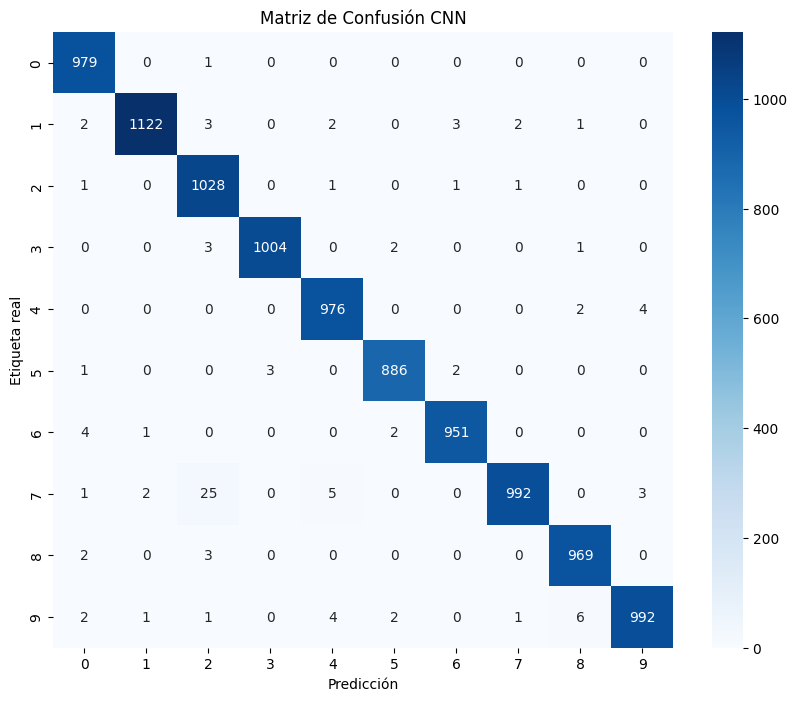


Dígitos con más errores:
Dígito 7 → Errores: 36
Dígito 9 → Errores: 17
Dígito 1 → Errores: 13


In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Suponiendo que ya tienes el modelo entrenado y x_test, y_test
# Predecir clases
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

#  Classification report
report = classification_report(y_test, y_pred_classes)
print(" Classification Report:\n")
print(report)

#  Matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión CNN")
plt.show()

# Identificar dígitos con más errores
errors_per_digit = cm.sum(axis=1) - np.diag(cm)
most_mistaken = np.argsort(errors_per_digit)[::-1]  # dígitos con más errores

print("\nDígitos con más errores:")
for idx in most_mistaken[:3]:  # mostrar los 3 más problemáticos
    print(f"Dígito {idx} → Errores: {errors_per_digit[idx]}")


Ejercicio 10

In [ ]:
# Guardar el modelo en formato .h5
model.save("modelo_mnist.h5")
print(" Modelo guardado como modelo_mnist.h5")

#  Cargar el modelo
from tensorflow.keras.models import load_model

loaded_model = load_model("modelo_mnist.h5")
print(" Modelo cargado nuevamente")

# 3️⃣ Probar desempeño en conjunto de prueba
test_loss, test_acc = loaded_model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\n Precisión en test: {test_acc*100:.2f}%")
print(f" Pérdida en test: {test_loss:.4f}")

# En general, la CNN funcionó mejor que el SVM y la MLP, porque puede aprender características espaciales

 Modelo guardado como modelo_mnist.h5


 Modelo cargado nuevamente

 Precisión en test: 98.99%
 Pérdida en test: 0.0303
